# Import Library 

In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymysql
import time
from celluloid import Camera

# Excel to MySQL

In [2]:
data = pd.read_excel("./db_score.xlsx")

conn = pymysql.connect(host='localhost', user='root', password=",./l;'p[]a", db='university')
curs = conn.cursor(pymysql.cursors.DictCursor)

db_connection_str = "mysql+pymysql://root:,./l;'p[]a@localhost/university"
db_connection = create_engine(db_connection_str)
data.to_sql(name='db_score', con=db_connection, if_exists='replace', index=False)

curs.close()
conn.close()

# Load Data for Simple Linear Regression
* 독립변수 1개, 종속변수 1개

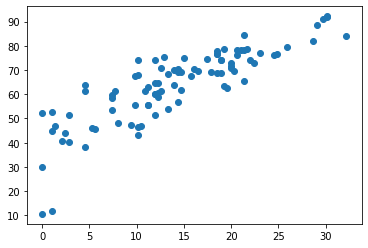

In [3]:
def load_dbscore_data():
    conn = pymysql.connect(host='localhost', user='root', password=",./l;'p[]a", db='university')
    curs = conn.cursor(pymysql.cursors.DictCursor)
    
    sql = "select * from db_score"
    curs.execute(sql)
    
    data = curs.fetchall()
    
    curs.close()
    conn.close()
    
    X = [( t['final'] ) for t in data]
    X = np.array(X)
    
    y = [(t['score']) for t in data]
    y = np.array(y)

    return X, y

X, y = load_dbscore_data()


plt.scatter(X, y) 
plt.show()

# LS for Simple Linear Regression

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     228.6
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           1.94e-26
Time:                        23:25:32   Log-Likelihood:                -322.30
No. Observations:                  92   AIC:                             648.6
Df Residuals:                      90   BIC:                             653.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.6247      1.766     23.009      0.0

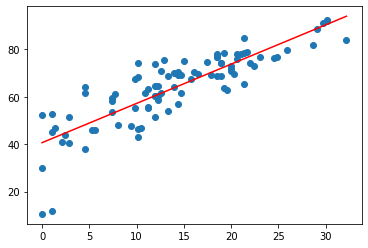

In [4]:
import statsmodels.api as sm
X_const = sm.add_constant(X)

model = sm.OLS(y, X_const)
ls = model.fit()

print(ls.summary())

ls_c = ls.params[0]
ls_m = ls.params[1]

y_pred = ls_m*X + ls_c

plt.scatter(X, y) 
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red')
plt.show()

# Naive Gradient Descent for Simple Linear Regression
* epoch 1000단위로 m, c값과 gradient를 출력 
* gradient가 0.0001보다 작을 경우 early stop
* plot한 것을 celluloid 라이브러리를 이용하여 gif파일로 저장
* 정확한 시간 측정을 위해 gif파일로 만드는 코드는 주석 처리한 후 측정

In [5]:
def gradient_descent_naive(X, y):

    epochs = 100000
    min_grad = 0.0001
    learning_rate = 0.001
    
    m = 0.0
    c = 0.0
    
    n = len(y)
    
    c_grad = 0.0
    m_grad = 0.0
    
    for epoch in range(epochs):
        
        for i in range(n):
            y_pred = m * X[i] + c
            m_grad += 2*(y_pred-y[i]) * X[i]
            c_grad += 2*(y_pred - y[i])

        c_grad /= n
        m_grad /= n
        
        m = m - learning_rate * m_grad
        c = c - learning_rate * c_grad
        
#         if(epoch % 10 == 0):
#             plt.scatter(X, y, color='b')
#             plt.plot(X, m*X+c, color='r')
#             camera.snap()
        
        if (epoch % 1000 == 0):
            print("epoch %d: m_grad=%f, c_grad=%f, m=%f, c=%f" %(epoch, m_grad, c_grad, m, c))
        
        if (abs(m_grad) < min_grad and abs(c_grad) < min_grad):
            break
        
    return m, c

# fig = plt.figure()
# camera = Camera(fig)

start_time = time.time()
m, c = gradient_descent_naive(X, y)
end_time = time.time()

# animation = camera.animate(interval=50, blit=True)
# animation.save('naive GD.gif')

print("%f seconds" %(end_time - start_time))

print("\n\nFinal:")
print("gdn_m=%f, gdn_c=%f" %(m, c) )
print("ls_m=%f, ls_c=%f" %(ls_m, ls_c) )

epoch 0: m_grad=-2010.578272, c_grad=-128.088261, m=2.010578, c=0.128088
epoch 1000: m_grad=0.642195, c_grad=-11.794960, m=3.037510, c=15.237679
epoch 2000: m_grad=0.403588, c_grad=-7.412555, m=2.523940, c=24.670218
epoch 3000: m_grad=0.253635, c_grad=-4.658428, m=2.201187, c=30.598107
epoch 4000: m_grad=0.159397, c_grad=-2.927594, m=1.998352, c=34.323495
epoch 5000: m_grad=0.100174, c_grad=-1.839849, m=1.870881, c=36.664719
epoch 6000: m_grad=0.062954, c_grad=-1.156255, m=1.790771, c=38.136064
epoch 7000: m_grad=0.039564, c_grad=-0.726650, m=1.740426, c=39.060732
epoch 8000: m_grad=0.024864, c_grad=-0.456664, m=1.708787, c=39.641841
epoch 9000: m_grad=0.015626, c_grad=-0.286991, m=1.688903, c=40.007039
epoch 10000: m_grad=0.009820, c_grad=-0.180360, m=1.676407, c=40.236548
epoch 11000: m_grad=0.006171, c_grad=-0.113347, m=1.668554, c=40.380783
epoch 12000: m_grad=0.003878, c_grad=-0.071233, m=1.663618, c=40.471428
epoch 13000: m_grad=0.002437, c_grad=-0.044767, m=1.660517, c=40.528394

# Vectortized Gradient Descent for Simple Linear Regression
* 벡터화 연산을 이용하여 naive GD의 이중 for문을 단일 for문으로 작성

In [6]:
def gradient_descent_vectorized(X, y):
    epochs = 100000
    min_grad = 0.0001
    learning_rate = 0.001
    
    m = 0.0
    c = 0.0
    
    n = len(y)
    
    c_grad = 0.0
    m_grad = 0.0

    for epoch in range(epochs):    
    
        y_pred = m * X + c
        m_grad = (2*(y_pred - y)*X).sum()/n
        c_grad = (2*(y_pred - y)).sum()/n
        
        m = m - learning_rate * m_grad
        c = c - learning_rate * c_grad        

        if (epoch % 1000 == 0):
            print("epoch %d: m_grad=%f, c_grad=%f, m=%f, c=%f" %(epoch, m_grad, c_grad, m, c))
    
        if (abs(m_grad) < min_grad and abs(c_grad) < min_grad):
            break

    return m, c

start_time = time.time()
m, c = gradient_descent_vectorized(X, y)
end_time = time.time()

print("%f seconds" %(end_time - start_time))

print("\n\nFinal:")
print("gdv_m=%f, gdv_c=%f" %(m, c) )
print("ls_m=%f, ls_c=%f" %(ls_m, ls_c) )

epoch 0: m_grad=-2010.578272, c_grad=-128.088261, m=2.010578, c=0.128088
epoch 1000: m_grad=0.638426, c_grad=-11.725729, m=3.044511, c=15.109091
epoch 2000: m_grad=0.403252, c_grad=-7.406372, m=2.532763, c=24.508185
epoch 3000: m_grad=0.254708, c_grad=-4.678118, m=2.209525, c=30.444975
epoch 4000: m_grad=0.160882, c_grad=-2.954860, m=2.005356, c=34.194855
epoch 5000: m_grad=0.101619, c_grad=-1.866391, m=1.876397, c=36.563407
epoch 6000: m_grad=0.064186, c_grad=-1.178876, m=1.794942, c=38.059466
epoch 7000: m_grad=0.040542, c_grad=-0.744619, m=1.743492, c=39.004428
epoch 8000: m_grad=0.025608, c_grad=-0.470327, m=1.710994, c=39.601299
epoch 9000: m_grad=0.016175, c_grad=-0.297074, m=1.690468, c=39.978302
epoch 10000: m_grad=0.010216, c_grad=-0.187642, m=1.677502, c=40.216431
epoch 11000: m_grad=0.006453, c_grad=-0.118521, m=1.669313, c=40.366841
epoch 12000: m_grad=0.004076, c_grad=-0.074862, m=1.664140, c=40.461845
epoch 13000: m_grad=0.002575, c_grad=-0.047285, m=1.660873, c=40.521853

# Load Data for Multiple Linear Regression
* 독립변수 3개와 종속변수 1개

In [7]:
def load_dbscore_data():
    conn = pymysql.connect(host='localhost', user='root', password=",./l;'p[]a", db='university')
    curs = conn.cursor(pymysql.cursors.DictCursor)
    
    sql = "select * from db_score"
    curs.execute(sql)
    
    data  = curs.fetchall()
    
    curs.close()
    conn.close()
    
    X = [(t['attendance'], t['homework'], t['final'] ) for t in data]
    X = np.array(X)
   
    y = [(t['score']) for t in data]
    y = np.array(y)

    return X, y

X, y = load_dbscore_data()
print('X:\n', X)
print('y:\n', y)

X:
 [[ 7.73 19.37 30.1 ]
 [ 7.73 20.   30.1 ]
 [ 7.73 19.37 29.75]
 [ 8.   18.12 29.05]
 [ 8.   20.   21.35]
 [ 8.   19.37 32.2 ]
 [ 8.   19.37 28.7 ]
 [ 8.   16.87 25.9 ]
 [ 8.   19.37 21.7 ]
 [ 7.73 20.   19.25]
 [ 8.   19.37 21.35]
 [ 6.66 19.37 20.65]
 [ 8.   19.37 21.  ]
 [ 8.   20.   18.55]
 [ 7.73 18.12 23.1 ]
 [ 8.   19.37 24.85]
 [ 7.46 20.   18.55]
 [ 8.   19.37 18.55]
 [ 8.   19.37 24.5 ]
 [ 8.   19.37 20.65]
 [ 8.   19.37 12.95]
 [ 8.   16.87 15.05]
 [ 8.   19.37 17.5 ]
 [ 8.   19.37 18.9 ]
 [ 7.73 19.37 10.15]
 [ 8.   16.87 18.9 ]
 [ 8.   19.37 22.05]
 [ 7.73 19.37 11.9 ]
 [ 8.   16.25 22.4 ]
 [ 8.   16.87 19.95]
 [ 8.   15.   19.95]
 [ 7.73 20.   12.6 ]
 [ 8.   19.37 19.95]
 [ 8.   20.   14.35]
 [ 8.   18.12 16.1 ]
 [ 8.   20.   14.  ]
 [ 8.   16.87 20.3 ]
 [ 7.73 20.   16.45]
 [ 8.   13.75 14.35]
 [ 8.   20.   14.7 ]
 [ 7.46 19.37 17.85]
 [ 8.   19.37 18.55]
 [ 7.73 19.37 18.9 ]
 [ 8.   17.5  13.3 ]
 [ 8.   19.37 10.15]
 [ 8.   19.37 15.75]
 [ 8.   20.    9.8 ]
 [ 8.   1

# LS for Multiple Linear Regression
* 예측 값과 실제 값 출력

In [8]:
import statsmodels.api as sm
X_const = sm.add_constant(X)

model = sm.OLS(y, X_const)
ls = model.fit()

print(ls.summary())

ls_c = ls.params[0]
ls_m = ls.params[1:]

y_pred = np.dot(np.reshape(ls_m, (1,3)), X.T)  +ls_c

print('\n\ny_pred:\n', np.around(y_pred.reshape(-1), 2))
print('y:\n', y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     137.9
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           3.76e-33
Time:                        23:25:34   Log-Likelihood:                -300.38
No. Observations:                  92   AIC:                             608.8
Df Residuals:                      88   BIC:                             618.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6583     15.619     -0.234      0.8

# Naive Gradient Descent for Multiple Linear Regression
* 100,000 epoch 학습
* 1000 epoch마다 m, c값과 gradient를 출력

In [18]:
def gradient_descent_naive(X, y):
    epochs = 100000
    min_grad = 0.0001
    learning_rate = 0.001

    m = np.zeros(3)
    c = 0.0

    n = len(y)

    c_grad = 0.0
    m_grad = np.zeros(3)
    
    for epoch in range(epochs):

        for i in range(n):
            y_pred = np.dot(m, X[i]) + c
            m_grad[0] += 2*(y_pred-y[i]) * X[i][0]
            m_grad[1] += 2*(y_pred-y[i]) * X[i][1]
            m_grad[2] += 2*(y_pred-y[i]) * X[i][2]

            c_grad += 2*(y_pred-y[i])

        c_grad /= n
        m_grad[0] /= n
        m_grad[1] /= n
        m_grad[2] /= n

        m = np.array([m[0] - learning_rate * m_grad[0], m[1] - learning_rate * m_grad[1], m[2] - learning_rate * m_grad[2]])
        c = c - learning_rate * c_grad

        if (epoch % 1000 == 0):
            print("epoch %d: m_grad=%s, c_grad=%s, m=%s, c=%s" %(epoch, m_grad, c_grad, m, c))

#         if (abs(m_grad[0]) < min_grad and abs(m_grad[1]) < min_grad and abs(m_grad[2]) < min_grad and abs(c_grad) < min_grad):
#             break
            
    return m, c

start_time = time.time()
m, c = gradient_descent_naive(X, y)
end_time = time.time()

print("%f seconds" %(end_time - start_time))

print("\n\nFinal:")
print("gdn_m=%s, gdn_c=%f" %(m, c) )
print("ls_m=%s, ls_c=%f" %(ls_m, ls_c) )

epoch 0: m_grad=[-1003.71381957 -2385.09006522 -2010.57827174], c_grad=-128.0882608695652, m=[1.00371382 2.38509007 2.01057827], c=0.1280882608695652
epoch 1000: m_grad=[-0.16567624  0.06880196  0.00152448], c_grad=-0.008482821663066391, m=[1.32353613 1.76635216 1.50135236], c=0.15995122073729898
epoch 2000: m_grad=[-0.02620663  0.01023607  0.00023649], c_grad=0.010794442916386792, m=[1.39846011 1.73565919 1.50066598], c=0.1558823749677086
epoch 3000: m_grad=[-5.53128200e-03  1.55652433e-03  4.55672946e-05], c_grad=0.013606680581506898, m=[1.4112143  1.73107091 1.50055372], c=0.14325014113265833
epoch 4000: m_grad=[-2.46112030e-03  2.70080677e-04  1.72345196e-05], c_grad=0.01397898692896006, m=[1.4147489  1.73035145 1.50052658], c=0.12939337008790522
epoch 5000: m_grad=[-2.00004779e-03  7.92853964e-05  1.29968228e-05], c_grad=0.013989863135422739, m=[1.41691107 1.73020549 1.50051209], c=0.11539950547415445
epoch 6000: m_grad=[-1.92566158e-03  5.08643865e-05  1.23301304e-05], c_grad=0.0

epoch 52000: m_grad=[-1.61366997e-03  3.87401839e-05  1.03044825e-05], c_grad=0.011760461126120015, m=[1.49980883 1.72819896 1.49998261], c=-0.48845421898885416
epoch 53000: m_grad=[-1.60769428e-03  3.85967226e-05  1.02663234e-05], c_grad=0.011716910154028464, m=[1.5014195  1.72816029 1.49997233], c=-0.500192869388804
epoch 54000: m_grad=[-1.60174072e-03  3.84537925e-05  1.02283056e-05], c_grad=0.011673520458532895, m=[1.50302422 1.72812177 1.49996208], c=-0.5118880495854535
epoch 55000: m_grad=[-1.59580920e-03  3.83113913e-05  1.01904281e-05], c_grad=0.011630291442376957, m=[1.50462299 1.72808339 1.49995187], c=-0.523539920556303
epoch 56000: m_grad=[-1.58989965e-03  3.81695181e-05  1.01526916e-05], c_grad=0.011587222510599854, m=[1.50621584 1.72804515 1.4999417 ], c=-0.5351486426827212
epoch 57000: m_grad=[-1.58401198e-03  3.80281700e-05  1.01150945e-05], c_grad=0.011544313070330789, m=[1.50780279 1.72800705 1.49993156], c=-0.5467143757521612
epoch 58000: m_grad=[-1.57814612e-03  3.7

# Vectorized Gradient Descent for Multiple Linear Regression
* 벡터화 연산을 이용하여 naive GD의 이중 for문을 단일 for문으로 작성
* 100,000 epoch을 수행하는데 naive GD는 21.001699초가 소요되었고, vectorized GD는 1.341501초 소요

In [19]:
def gradient_descent_vectorized(X, y):
    epochs = 100000
    min_grad = 0.0001
    learning_rate = 0.001
    
    m = np.zeros(3)
    c = 0.0
    
    n = len(y)
    
    c_grad = 0.0
    m_grad = np.zeros(3)

    for epoch in range(epochs):    
    
        y_pred = np.dot(m.reshape(1, 3), X.T) + c
        m_grad[0] = (2*(y_pred - y)*X.T[0]).sum()/n
        m_grad[1] = (2*(y_pred - y)*X.T[1]).sum()/n
        m_grad[2] = (2*(y_pred - y)*X.T[2]).sum()/n

        c_grad = (2*(y_pred - y)).sum()/n
        
        m = m - learning_rate * m_grad
        c = c - learning_rate * c_grad        

        if (epoch % 1000 == 0):
            print("epoch %d: m_grad=%s, c_grad=%f, m=%s, c=%f" %(epoch, m_grad, c_grad, m, c))
    
#         if (abs(m_grad[0]) < min_grad and abs(m_grad[1]) < min_grad and abs(m_grad[2]) < min_grad and abs(c_grad) < min_grad):
#             break

    return m, c

start_time = time.time()
m, c = gradient_descent_vectorized(X, y)
end_time = time.time()

print("%f seconds" %(end_time - start_time))

print("\n\nFinal:")
print("gdv_m=%s, gdv_c=%f" %(m, c))
print("ls_m=%s, ls_c=%f" %(ls_m, ls_c))

epoch 0: m_grad=[-1003.71381957 -2385.09006522 -2010.57827174], c_grad=-128.088261, m=[1.00371382 2.38509007 2.01057827], c=0.128088
epoch 1000: m_grad=[-0.1672742   0.06948137  0.0015393 ], c_grad=-0.008861, m=[1.32171325 1.76710926 1.50136913], c=0.159856
epoch 2000: m_grad=[-0.02694092  0.01055272  0.00024333], c_grad=0.010537, m=[1.39787825 1.73588682 1.50067123], c=0.156115
epoch 3000: m_grad=[-5.70037851e-03  1.63577205e-03  4.71881960e-05], c_grad=0.013429, m=[1.41102996 1.73112333 1.50055524], c=0.143693
epoch 4000: m_grad=[-2.48041087e-03  2.86358050e-04  1.74715123e-05], c_grad=0.013823, m=[1.41464085 1.73036363 1.50052734], c=0.130001
epoch 5000: m_grad=[-1.98725426e-03  8.20287729e-05  1.29370798e-05], c_grad=0.013839, m=[1.41680212 1.7302099  1.5005128 ], c=0.116160
epoch 6000: m_grad=[-1.90672763e-03  5.09688719e-05  1.22132461e-05], c_grad=0.013799, m=[1.41873812 1.73014802 1.50050033], c=0.102339
epoch 7000: m_grad=[-1.88865986e-03  4.61278007e-05  1.20661527e-05], c_gr

epoch 62000: m_grad=[-1.54184809e-03  3.70159202e-05  9.84584655e-06], c_grad=0.011237, m=[1.51460064 1.72784385 1.49988816], c=-0.596257
epoch 63000: m_grad=[-1.53620031e-03  3.68803312e-05  9.80978134e-06], c_grad=0.011196, m=[1.51613966 1.7278069  1.49987833], c=-0.607474
epoch 64000: m_grad=[-1.53057323e-03  3.67452389e-05  9.77384825e-06], c_grad=0.011155, m=[1.51767304 1.72777009 1.49986854], c=-0.618649
epoch 65000: m_grad=[-1.52496675e-03  3.66106416e-05  9.73804683e-06], c_grad=0.011114, m=[1.51920081 1.72773341 1.49985878], c=-0.629783
epoch 66000: m_grad=[-1.51938081e-03  3.64765371e-05  9.70237637e-06], c_grad=0.011073, m=[1.52072298 1.72769687 1.49984906], c=-0.640877
epoch 67000: m_grad=[-1.51381533e-03  3.63429239e-05  9.66683676e-06], c_grad=0.011033, m=[1.52223957 1.72766046 1.49983938], c=-0.651930
epoch 68000: m_grad=[-1.50827024e-03  3.62098000e-05  9.63142711e-06], c_grad=0.010992, m=[1.52375061 1.72762418 1.49982973], c=-0.662942
epoch 69000: m_grad=[-1.50274546e-